In [ ]:
from google.colab import drive
drive.mount('/content/drive')

import os
os.chdir("/content/drive/MyDrive/Deep learning/Mid_term")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##1. Introduction
The company seeks to automate (in real time) the loan qualifying procedure based on information given by customers while filling out an online application form. It is expected that the development of deep learning models that can help the company predict loan approval in accelerating decision-making process for determining whether an applicant is eligible for a loan or not. 



##2. Data analysis
These details are Gender, Marital Status, Education, Number of Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have given a problem to identify the customers segments, those are eligible for loan amount so that they can specifically target these customers. Here they have provided a partial data set.

We first load the loan data. Please print out the shape of 'loan_data'.  

In [ ]:
from operator import index
#Load dataset
loan_data=pd.read_csv('loan.csv')

# start your code here
n_record,n_category=loan_data.shape[0], loan_data.shape[1]
# end your code here
print('There are %d records.' % n_record)
print('Every record has %d categories' % n_category)

There are 614 records.
Every record has 13 categories


Expected output: 

```
There are 614 records.
Every record has 13 categories
```

Now, let's print the 1st 20 records of the loan data, and have a better understanding of what the data look like.

In [ ]:
loan_data.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


We can see that there are 13 categories in the records. Please pay close attention to the data. Sometimes, there are `NaN` values. We will need to fix this later. Right now, Let's analyze the categories one by one. 

###2.1 Loan ID
Loan ID is our 1st category. However, this category has no relevance to the approval status. Therefore, we will drop this category. Please print out the first 5 records of the 'loan_data' to make sure that the category 'Loan_ID' is dropped. Hint: check cells above to see how we print the first 20 records.

In [ ]:
loan_data = loan_data.drop(['Loan_ID'], axis = 1)

#start your code here
loan_data.head(5)
# end your code here

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Expected output:
![alt text](https://drive.google.com/uc?id=1F8Lve6Wx6lYuoMPCNaq_cLEzT1dY9Z__)

### 2.2 Gender
We would like to know among all these 614 records, how many of them are male, how many of them are female, how many of them are null entries.

Male      489
Female    112
NaN        13
Name: Gender, dtype: int64


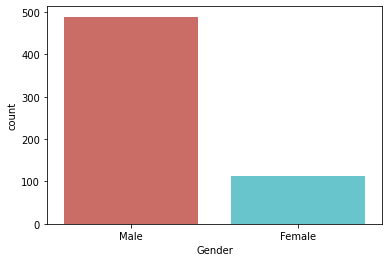

Percentage of Male: 79.64%
Percentage of Female: 18.24%
Percentage of missing value: 2.12%


In [ ]:
gender_count=loan_data.Gender.value_counts(dropna=False) # count different values in 'Gender' category
print(gender_count)
sns.countplot(x="Gender", data=loan_data, palette="hls")
plt.show()

p_male=gender_count['Male']/n_record
p_female=gender_count['Female']/n_record
p_NaN=gender_count[-1]/n_record

print('Percentage of Male: {:.2f}%'.format(p_male*100))
print('Percentage of Female: {:.2f}%'.format(p_female*100))
print('Percentage of missing value: {:.2f}%'.format(p_NaN*100))



Conclusion: There are much more male applicants than female applicants. The missing value takes 2.12% of the records, a small portion of the whole records.

### 2.3 Married
Please follow the same idea in section 2.2 to analyze the category 'Married' and make a conclusion at the end of this section.

Yes    398
No     213
NaN      3
Name: Married, dtype: int64


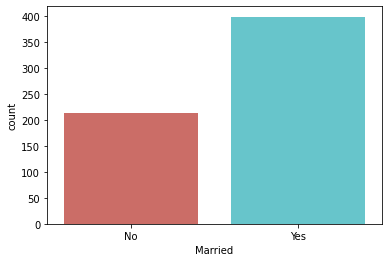

Percentage of Married: 64.82%
Percentage of un-Married: 34.69%
Percentage of missing value: 0.49%


In [ ]:
# start your code here
Married_count=loan_data.Married.value_counts(dropna=False) # count different values in 'Gender' category
print(Married_count)
sns.countplot(x="Married", data=loan_data, palette="hls")
plt.show()

p_Yes=Married_count['Yes']/n_record
p_No=Married_count['No']/n_record
p_NaN=Married_count[-1]/n_record

print('Percentage of Married: {:.2f}%'.format(p_Yes*100))
print('Percentage of un-Married: {:.2f}%'.format(p_No*100))
print('Percentage of missing value: {:.2f}%'.format(p_NaN*100))
# end your code here

Expected output:

![alt text](https://drive.google.com/uc?id=1GbYJ8nHEgGximpRJMJFwQP4bIiP-luPN)

Please make your conclusion here.

###2.4 Dependents

Please follow the same idea in section 2.2 to analyze the category 'Dependents' and make a conclusion at the end of this section.

0      345
1      102
2      101
3+      51
NaN     15
Name: Dependents, dtype: int64


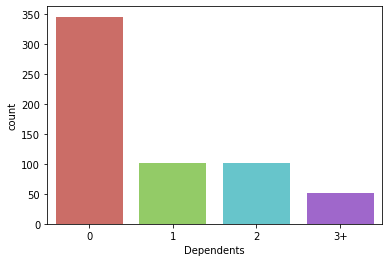

Percentage of 0 Dependents: 56.19%
Percentage of 1 Dependents: 16.61%
Percentage of 2 Dependents: 16.45%
Percentage of 3+ Dependents: 8.31%
Percentage of missing value: 2.44%


In [ ]:
# start your code here
Dependents_count=loan_data.Dependents.value_counts(dropna=False) # count different values in 'Gender' category
print(Dependents_count)
sns.countplot(x="Dependents", data=loan_data, palette="hls")
plt.show()

p_0=Dependents_count['0']/n_record
p_1=Dependents_count['1']/n_record
p_2=Dependents_count['2']/n_record
p_3=Dependents_count['3+']/n_record
p_NaN=Dependents_count[-1]/n_record

print('Percentage of 0 Dependents: {:.2f}%'.format(p_0*100))
print('Percentage of 1 Dependents: {:.2f}%'.format(p_1*100))
print('Percentage of 2 Dependents: {:.2f}%'.format(p_2*100))
print('Percentage of 3+ Dependents: {:.2f}%'.format(p_3*100))
print('Percentage of missing value: {:.2f}%'.format(p_NaN*100))
# end your code here

Expected output:

![alt text](https://drive.google.com/uc?id=1T05UzKCRuFpxUY4EJKzOZ-MQgFfSsR0v)

Please make your conclusion here.


### 2.5 Education

Please follow the same idea in section 2.2 to analyze the category 'Education' and make a conclusion at the end of this section.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


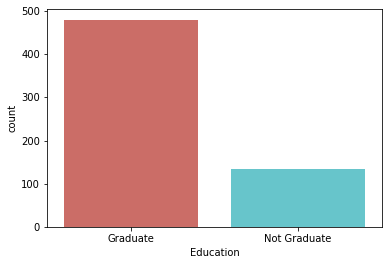

Percentage of graduate: 78.18%
Percentage of not graduate: 21.82%


In [ ]:
# start your code here
Education_count=loan_data.Education.value_counts(dropna=False) # count different values in 'Gender' category
print(Education_count)
sns.countplot(x="Education", data=loan_data, palette="hls")
plt.show()

p_Graduate=Education_count['Graduate']/n_record
p_Not_Graduate=Education_count['Not Graduate']/n_record


print('Percentage of graduate: {:.2f}%'.format(p_Graduate*100))
print('Percentage of not graduate: {:.2f}%'.format(p_Not_Graduate*100))

# end your code here

Expected output:

![alt text](https://drive.google.com/uc?id=1uAg12JNPRvQCVZd6tPtYfUZH9Qqs4AR5)

Please make your conclusion here.

### 2.6 Self_Employed

Please follow the same idea in section 2.2 to analyze the category 'Self_Employed' and make a conclusion at the end of this section.

No     500
Yes     82
NaN     32
Name: Self_Employed, dtype: int64


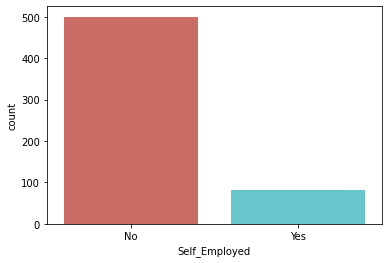

Percentage of Self_Employed: 13.36%
Percentage of not Self_Employed: 81.43%
Percentage of missing value: 5.21%


In [ ]:
# start your code here
Self_Employed_count=loan_data.Self_Employed.value_counts(dropna=False) # count different values in 'Gender' category
print(Self_Employed_count)
sns.countplot(x="Self_Employed", data=loan_data, palette="hls")
plt.show()

p_Yes=Self_Employed_count['Yes']/n_record
p_No=Self_Employed_count['No']/n_record
p_NaN=Self_Employed_count[-1]/n_record

print('Percentage of Self_Employed: {:.2f}%'.format(p_Yes*100))
print('Percentage of not Self_Employed: {:.2f}%'.format(p_No*100))
print('Percentage of missing value: {:.2f}%'.format(p_NaN*100))
# end your code here

Expected output:

![alt text](https://drive.google.com/uc?id=1SLZFuBWQpXL62a9ppu9i8An4WDruJOmi)

Please make your conclusion here.

### 2.7 Applicant income
The applicant income has a large range of values, and the previous analysis method doesn't apply well in this case. We will use histogram to characterize the distribution of the income. 

From the plot, we can see that the income of most applicants are below $10,000, and are not evenly distributed. Normalization is definitly needed for this category. 

Besides, the distribution has a thin but long right tail. We will need to treat the right tail to make the distribution more concentrated.


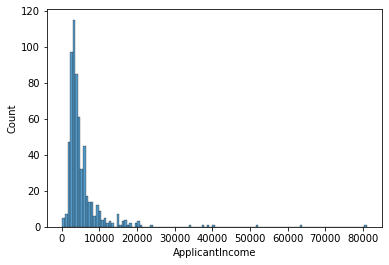

In [ ]:
sns.histplot(loan_data['ApplicantIncome'])
plt.show()

### 2.8 Coapplicant income
Please use the same technique in Section 2.7 to analyze the distribution of the 'CoapplicantIncome' and give a brief discussion of it. 

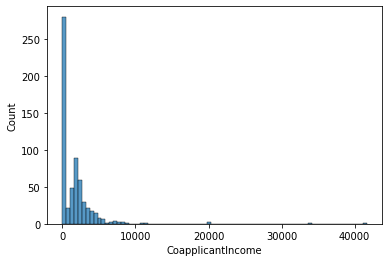

In [ ]:
# start your code here
sns.histplot(loan_data['CoapplicantIncome'])
plt.show()
# end your code here

Expected output:

![alt text](https://drive.google.com/uc?id=1Phqf9WgoHK6OZBuLLWhb8cexvn1bzqye)

Discussion here: 

### 2.9 Loan amount

Please use the same technique in Section 2.7 to analyze the distribution of the 'LoanAmount' and give a brief discussion of it. 

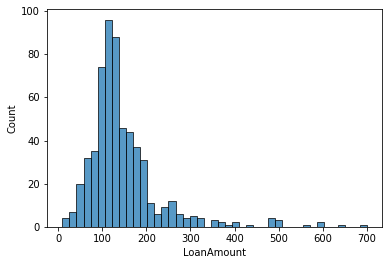

In [ ]:
# start your code here
sns.histplot(loan_data['LoanAmount'])
plt.show()
# end your code here

Expected output:

![alt text](https://drive.google.com/uc?id=1THtXJXErj8rMLcLMVAc1GIsInRajueKG)

Discussion here: 

### 2.10 Loan_amount_term

Please use the same technique in Section 2.7 to analyze the distribution of the 'Loan_Amount_Term	' and give a brief discussion of it. 

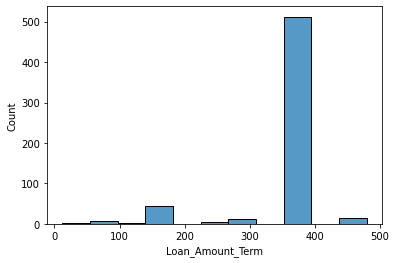

In [ ]:
# start your code here
sns.histplot(loan_data['Loan_Amount_Term'])
plt.show()
# end your code here

Expected output:

![alt text](https://drive.google.com/uc?id=1UTKNr75TQKF626JWvAJJ6ItM_dgw3R2J)

Discussion here: 

### 2.11 Credit history

Please follow the same technique in section 2.7 to analyze the category 'Credit_History' and give a grief discusion.

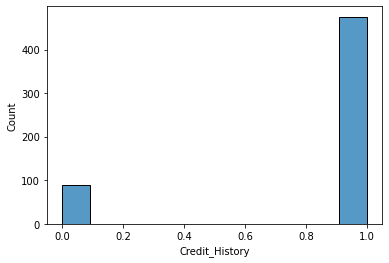

In [ ]:
# start your code here
sns.histplot(loan_data['Credit_History'])
plt.show()
# end your code here

Expected output:

![alt text](https://drive.google.com/uc?id=1O03n_ZcFpIsr-lubli-g_IPwL6ZhGpr0)

Discussion here: 

### 2.12 Property area

Please follow the same technique in section 2.2 to analyze the category 'Property_Area' and give a grief discusion.

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


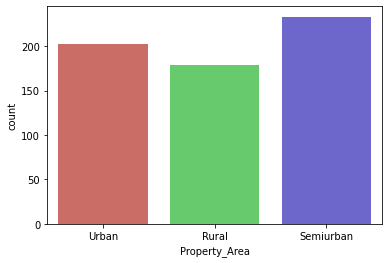

Percentage of Semiurban: 37.95%
Percentage of Urban: 32.90%
Percentage of Rural: 29.15%
Percentage of missing value: 29.15%


In [ ]:
# start your code here
Property_Area_count=loan_data.Property_Area.value_counts(dropna=False) # count different values in 'Gender' category
print(Property_Area_count)
sns.countplot(x="Property_Area", data=loan_data, palette="hls")
plt.show()

p_Semiurban=Property_Area_count['Semiurban']/n_record
p_Urban=Property_Area_count['Urban']/n_record
p_Rural=Property_Area_count['Rural']/n_record
p_NaN=Property_Area_count[-1]/n_record

print('Percentage of Semiurban: {:.2f}%'.format(p_Semiurban*100))
print('Percentage of Urban: {:.2f}%'.format(p_Urban*100))
print('Percentage of Rural: {:.2f}%'.format(p_Rural*100))
print('Percentage of missing value: {:.2f}%'.format(p_NaN*100))
# end your code here

Expected output:

![alt text](https://drive.google.com/uc?id=1ZQ0MRWAMe4fFTn9bF-M8ttIVDlJ1kysC)

Discussion here: 

###2.13 Loan Status
Please follow the same technique in section 2.2 to analyze the category 'Loan_Status' and give a grief discusion.

Y    422
N    192
Name: Loan_Status, dtype: int64


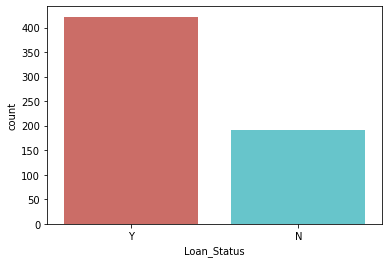

Percentage of YES: 68.73%
Percentage of NO: 31.27%
Percentage of missing value: 31.27%


In [ ]:
# start your code here
Loan_Status_count=loan_data.Loan_Status.value_counts(dropna=False) # count different values in 'Gender' category
print(Loan_Status_count)
sns.countplot(x="Loan_Status", data=loan_data, palette="hls")
plt.show()

p_Yes=Loan_Status_count['Y']/n_record
p_No=Loan_Status_count['N']/n_record
p_NaN=Loan_Status_count[-1]/n_record

print('Percentage of YES: {:.2f}%'.format(p_Yes*100))
print('Percentage of NO: {:.2f}%'.format(p_No*100))
print('Percentage of missing value: {:.2f}%'.format(p_NaN*100))
# end your code here

Expected output:

![alt text](https://drive.google.com/uc?id=1KByUcd1F74SAneDWcUgj9_8Vbb-pOGz3)

Discussion here: 


## 3. Data preprocessing

### 3.1 Data imputation

In [ ]:
# Checking Null Values.
loan_data.isnull().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term, and Credit_History features.
We will treat the missing values in all the features one by one.
We can consider these methods to fill the missing values:

* For numerical variables: imputation using mean or median
* For categorical variables: imputation using mode

There are very few missing values in Gender, Married, Dependents, Credit_History, and Self_Employed features so we can fill them using the mode of the features.

The imputation of 'Gender' is given. Please use the same command to fill the missing values in category 'Married', 'Dependents', 'Self_Employed', and 'Credit_History'. 

In [ ]:
loan_data['Gender'].fillna(loan_data['Gender'].mode()[0], inplace=True)
# start your code here
loan_data['Married'].fillna(loan_data['Married'].mode()[0], inplace=True)
loan_data['Dependents'].fillna(loan_data['Dependents'].mode()[0], inplace=True)
loan_data['Self_Employed'].fillna(loan_data['Self_Employed'].mode()[0], inplace=True)
loan_data['Credit_History'].fillna(loan_data['Credit_History'].mode()[0], inplace=True)
# end your code here

For numerical variables like LoanAmount and Loan_Amount_Term, we fill the missing values with their medians. The imputation of 'Loan_Amount_Term' is given. Please use the same command to fill the missing values in category 'LoanAmount'. 

In [ ]:
loan_data['Loan_Amount_Term'].fillna(loan_data['Loan_Amount_Term'].median(),inplace = True)
# start your code here
loan_data['LoanAmount'].fillna(loan_data['LoanAmount'].median(),inplace = True)
# end your code here

Now, let's print out the data to see whether we fill the missing values with reasonable values. You can compare the table below with the table in the beginning to see the differences. 

In [ ]:
loan_data.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


Please check whether all missing values are filled using the command `loan_data.isnull().sum()`. If you have all '0' entries, congratulations! You have finished the data imputation. 

In [ ]:
loan_data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

Expected output:
```
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64
```

### 3.2 Converting categorical values to numbers

Let's first take a look at the data type of the loan data.

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    object 
 1   Married            614 non-null    object 
 2   Dependents         614 non-null    object 
 3   Education          614 non-null    object 
 4   Self_Employed      614 non-null    object 
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    object 
 11  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(7)
memory usage: 57.7+ KB


From the information provided above, we see that the data type of 7 categories is object. We need to convert them to numbers to train our model. 

* For 'Gender' category, 'Male' is mapped to 0, 'Female' is mapped to 1.

Please use the same technique to do the following conversion. 

* For 'Married', 'Self_Employed', and 'Loan_Status' category, please map 'No' to 0 and 'Yes' to 1.

* For 'Dependents' category, please map '0' to 0, '1' to 1, '2' to 2, and '3+' to 3.

* For 'Education' category, please map 'Graduate' to 1 and 'Not Graduate' to 0.

* For 'Property_Area' category, please map 'Rural' to 0, 'Semiurban' to 1, and 'Urban' to 2.

In [ ]:
# Converting the categories into numbers using map function.
loan_data['Gender'] = loan_data['Gender'].map({'Male': 0, 'Female': 1})

# start your code here
loan_data['Married'] = loan_data['Married'].map({'No': 0, 'Yes': 1})
loan_data['Self_Employed'] = loan_data['Self_Employed'].map({'No': 0, 'Yes': 1})
loan_data['Loan_Status'] = loan_data['Loan_Status'].map({'N': 0, 'Y': 1})
loan_data['Dependents'] = loan_data['Dependents'].map({'0': 0, '1': 1, '2': 2,'3+': 3})
loan_data['Education'] = loan_data['Education'].map({'Graduate': 1, 'Not Graduate': 0})
loan_data['Property_Area'] = loan_data['Property_Area'].map({'Rural': 0, 'Semiurban': 1, 'Urban': 2})
# end your code here

Now, let's double check the data types to make sure that we have all numerical entries.

In [ ]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


Expected output:

```
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Gender             614 non-null    int64  
 1   Married            614 non-null    int64  
 2   Dependents         614 non-null    int64  
 3   Education          614 non-null    int64  
 4   Self_Employed      614 non-null    int64  
 5   ApplicantIncome    614 non-null    int64  
 6   CoapplicantIncome  614 non-null    float64
 7   LoanAmount         614 non-null    float64
 8   Loan_Amount_Term   614 non-null    float64
 9   Credit_History     614 non-null    float64
 10  Property_Area      614 non-null    int64  
 11  Loan_Status        614 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 57.7 KB
```

### 3.3 Right tail treatment
From section 2.7, 2.8, and 2.9, we see that the income of applicants, coapplicants, and the loan amount have long and thin right tail. 

It can be seen that having long and thin right tail often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove the tails from our data sets.

This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much but reduces the larger values. So, we get a distribution similar to normal distribution.
Let’s visualize the effect of log transformation.

Originally, the distribution of applicant income is as below.

![alt text](https://drive.google.com/uc?id=1UfnWuvx4SV0VLIm5cv0cR1zGteB2g199)

We will apply log transformation to the 'ApplicantIncome' category and recheck the distribution to see the difference. 

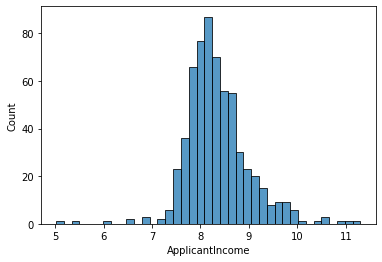

In [ ]:
epsilon=1
loan_data['ApplicantIncome']=np.log(epsilon+loan_data['ApplicantIncome'])
sns.histplot(loan_data['ApplicantIncome'])
plt.show()

After the tail treatment, the distribution looks more like a normal distribution. It gives a good base for the next step: data normalization. 

Please use the same methods to treat the tails in 'CoapplicantIncome' and 'LoanAmount' category.

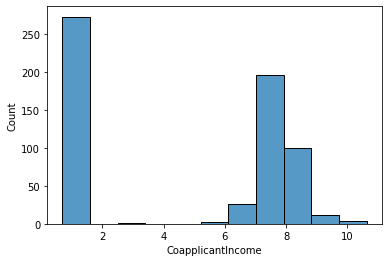

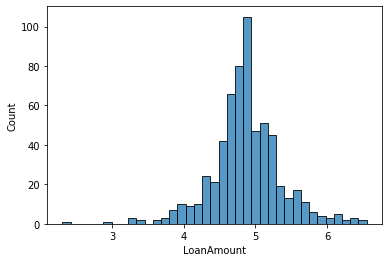

In [ ]:
# start your code here
epsilon=2
loan_data['CoapplicantIncome']=np.log(epsilon+loan_data['CoapplicantIncome'])
sns.histplot(loan_data['CoapplicantIncome'])
plt.show()

epsilon=1
loan_data['LoanAmount']=np.log(epsilon+loan_data['LoanAmount'])
sns.histplot(loan_data['LoanAmount'])
plt.show()
# end your code here

Expected output:

![alt text](https://drive.google.com/uc?id=11JyrjdzswoYkblgYxm8vvD5KssQmxkyw)

### 3.4 Other data preprocessing

We emphasized a lot that you will need to preprocess your data before using them to train your model. Now, please think about whether there are other preprocessing that you can do to help you train a good model. If yes, please do it here. 

In [ ]:
# start your code here

# end your code here
loan_data.shape

(614, 12)

### 3.5 Correlation among different categories

Now let’s look at the correlation between all the numerical variables. We will use the heat map to visualize the correlation. Heatmaps visualize data through variations in coloring. The variables with darker color means their correlation is more.

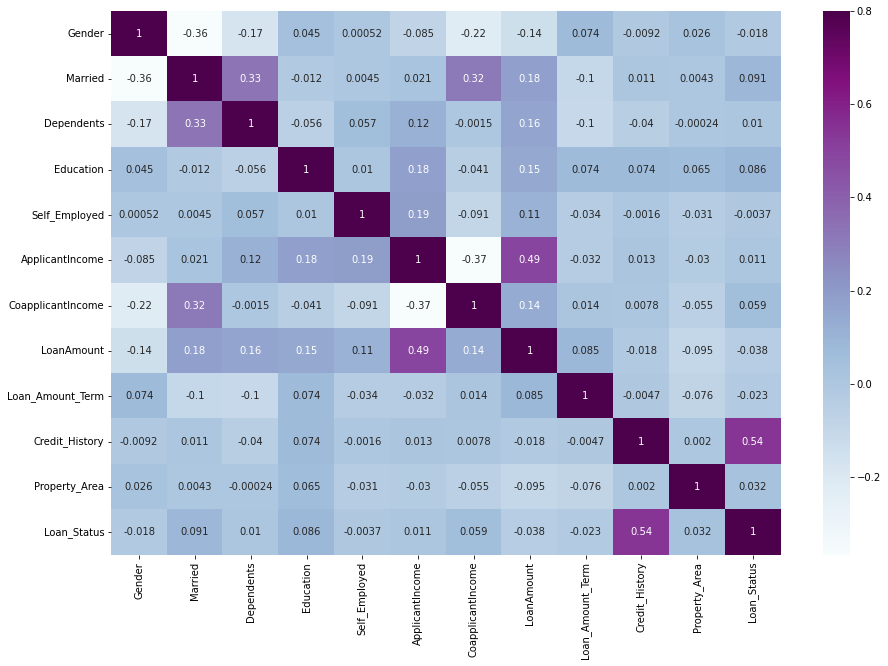

In [ ]:
plt.figure(figsize=(15,10))
sns.heatmap(loan_data.corr(), vmax=.8, cmap='BuPu',annot=True, fmt='.2g')

We see a strong correlation between 'Credit_History' and 'Loan_Status', 'LoanAmount' and 'ApplicantIncome', 'CoapplicantIncome' and 'Married', a strong reverse correlation between 'ApplicantIncome' and 'CoapplicantIncom'. When we choose the categories for the training input, these are all elements that need to be considered.

### 3.6 Input and output data splitting

We need to predict the 'Loan_Status'. So, our output is 'Loan_Status'. For the input, you can choose as many  relavant categories as you like.

The output data is seperated. As neural network only accept float as the training data set, we use `np.float32` to change the data type to float. 

Please choose your input categories using the similar ideas.

In [ ]:
#array = loan_data.values
Y = np.float32(loan_data[['Loan_Status']].values)
# start your code here
X = np.float32(loan_data[['Gender','Married','Dependents','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area']].values)
# end your code here
X.dtype

dtype('float32')

Expected output:
```
dtype('float32')
```

### 3.7 Training and testing data splitting

In our lecture, we mentioned that if you have a small dataset (<2000 samples). It is suggested to use 20% of it for testing purpose. It can be easily realized using sklearn library. 


In [ ]:
from sklearn import model_selection
x_train, x_test, y_train, y_test = model_selection.train_test_split(X, Y, test_size=0.2, random_state=1234)
print(x_train.shape)
print(y_train.shape)


(491, 10)
(491, 1)


## 4 Building Neural network

Please use what we learned before to build your neural network. You have the freedome to choose your network structure. Just keep it in mind that the number of neurons in the input layer and the output layer should be the same as the size of your input and output data for each sample. Besides, since this is a binary classification problem, the activation function in the output layer needs to be 'sigmoid' function. 

In [ ]:
import tensorflow as tf

# start your code here
tf.random.set_seed(1)
model=tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(10)), # how many elements are there in every training image?
    tf.keras.layers.Dense(10,activation='relu', # in layer 1, we will have 20 neurons and use 'relu' as the activation function
                            kernel_initializer='glorot_uniform', # we will randomly choose the initial weight using the 'glorot_uniform' method
                            bias_initializer='zeros'), # we will initialize all bias to be zeros.
    tf.keras.layers.Dense(30,activation='relu', # in layer 1, we will have 20 neurons and use 'relu' as the activation function
                            kernel_initializer='glorot_uniform', # we will randomly choose the initial weight using the 'glorot_uniform' method
                            bias_initializer='zeros'), # we will initialize all bias to be zeros.
    tf.keras.layers.Dense(10,activation='relu', # in layer 1, we will have 20 neurons and use 'relu' as the activation function
                            kernel_initializer='glorot_uniform', # we will randomly choose the initial weight using the 'glorot_uniform' method
                            bias_initializer='zeros'), # we will initialize all bias to be zeros.                        
    #please follow the example of layer 1 to add more hidden layers here. 

    # End adding hidden layers                    
    tf.keras.layers.Dense(1,activation='sigmoid', # how many elements are there in every training output
                            kernel_initializer='glorot_uniform',
                            bias_initializer='zeros'),
])

# end your code here
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 10)                110       
                                                                 
 dense_1 (Dense)             (None, 30)                330       
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 761
Trainable params: 761
Non-trainable params: 0
_________________________________________________________________


## 5. Compiling and training your neural network
Please use what you learned before to compile and train your neural network. 

In [ ]:
# start your code here
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005),  # Optimizer. Please change 'None' to some meaningful learning rate which is usually <1
    # Loss function to minimize
    loss=tf.keras.losses.BinaryCrossentropy(),
    # List of metrics to monitor
    metrics=['accuracy'],
                 )
history = model.fit(
    x_train, # input data
    y_train, # real output data
    validation_split=0.1,
    epochs=3000, 
)
#end your code here

Streaming output truncated to the last 5000 lines.
15/15 [==============================] - 0s 6ms/step - loss: 0.5977 - accuracy: 0.6931 - val_loss: 0.6689 - val_accuracy: 0.6400
Epoch 502/3000
15/15 [==============================] - 0s 6ms/step - loss: 0.5933 - accuracy: 0.6910 - val_loss: 0.6592 - val_accuracy: 0.6400
Epoch 503/3000
15/15 [==============================] - 0s 7ms/step - loss: 0.5945 - accuracy: 0.6910 - val_loss: 0.6707 - val_accuracy: 0.6400
Epoch 504/3000
15/15 [==============================] - 0s 7ms/step - loss: 0.5949 - accuracy: 0.6910 - val_loss: 0.6666 - val_accuracy: 0.6400
Epoch 505/3000
15/15 [==============================] - 0s 6ms/step - loss: 0.5936 - accuracy: 0.6910 - val_loss: 0.6595 - val_accuracy: 0.6400
Epoch 506/3000
15/15 [==============================] - 0s 7ms/step - loss: 0.5932 - accuracy: 0.6931 - val_loss: 0.6764 - val_accuracy: 0.6400
Epoch 507/3000
15/15 [==============================] - 0s 7ms/step - loss: 0.5984 - accuracy: 0.691

Let's take a look at the training history. You probably will need to adjust the parameters like learning rate, batch size, epochs, or even your NN structure. 

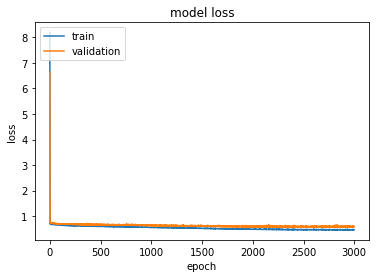

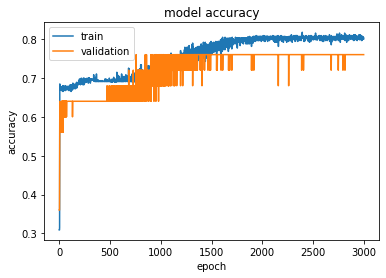

4/4 [==============================] - 0s 4ms/step - loss: 0.4604 - accuracy: 0.8618


[0.4603925347328186, 0.8617886304855347]

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
model.evaluate(x_test,y_test)

After several adjustion, the results may be still unsatisfying. In this case you will need to take a closer look at your prediction and the true value to see where the problems are. Please manually examine what the mistakes are, and use the technique we learned in the most recent 2 weeks to make some synthetic data to help improve your accuracy in Section 3.4. As a reference, the best accuracy that I can find online using NN is 80%. I was able to improve it to 82.5%. See how accurate you can achieve. 

In [ ]:
# Getting predictions for the test set
output = model.predict(x_test)
threshold=0.5
y_pred = np.where(output>=threshold,1,0)
print((y_pred==y_test).sum()/len(y_test))
# Getting accuracy score
for i in range(len(x_test)):
  if y_pred[i,:]<y_test[i,:]:
    print(y_test[i,:],y_pred[i,:],output[i,:], x_test[i,:])

0.8617886178861789
